In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/interpreted_seismics_2/surfaces/teste_4/"
nome_modelo = "BES-Seismics-Surfaces-Luis_Teste-4"
geo_model = gp.create_model(nome_modelo)

No module named 'osgeo'


### Detalhes dos dados
- Contém as surfaces geradas pelo Petrel a partir de interpretação sismica. Nesse tem o maastrichtiano, turoniano e cenomaniano.
- Todos os surfaces foram reduzidos em X e Y para diminuir a quantidade de pontos (500). De 386mil pontos para 4711. Quanto mais ponto, mais memoria usa.
- Cada surfaces (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[430853.235, 474018.154, 7782491.414, 7798430.28, -6544.67, -2566.97],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_500m.csv",
    #path_o=data_path + "orientations_points_2.csv",
)

Active grids: ['regular']


BES-Seismics-Surfaces-Luis_Teste-4  2024-03-26 12:42

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Default series,1,#015482,1
1,TURONIANO,Default series,2,#9f0052,2
2,CENOMANIANO,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("MAASTRICHTIANO",),
        "Strat_Series_2": ("TURANIANO",),
        "Strat_Series_3": ("CENOMANIANO",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
1,TURONIANO,Default series,1,#9f0052,1
0,MAASTRICHTIANO,Strat_Series_1,1,#015482,2
2,CENOMANIANO,Strat_Series_3,1,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,False,False,False
Strat_Series_1,2,Erosion,False,False,False
Strat_Series_3,3,Erosion,False,False,False
Basement_series,4,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth      surface  G_x   
surface_points 2262  444066.31  7.80e+06 -4469.07  2.00e-06    TURONIANO  NaN  \
               2263  444503.83  7.80e+06 -4580.91  2.00e-06    TURONIANO  NaN   
               2264  445003.85  7.80e+06 -4645.88  2.00e-06    TURONIANO  NaN   
               2265  445503.87  7.80e+06 -4641.85  2.00e-06    TURONIANO  NaN   
               2266  446003.89  7.80e+06 -4490.98  2.00e-06    TURONIANO  NaN   
...                        ...       ...      ...       ...          ...  ...   
               4705  472005.56  7.79e+06 -5994.45  2.00e-06  CENOMANIANO  NaN   
               4706  472505.59  7.79e+06 -6036.54  2.00e-06  CENOMANIANO  NaN   
               4707  473005.61  7.79e+06 -6065.91  2.00e-06  CENOMANIANO  NaN   
               4708  473505.63  7.79e+06 -6107.33  2.00e-06  CENOMANIANO  NaN   
               4709  474005.65  7.79e+06 -6137.75  2.00e-06  CENOMANIANO  NaN   

                     G_y  G_z  
surface_points 2262  NaN  NaN  
               2263  NaN  NaN  
               2264  NaN  NaN  
               2265  NaN  NaN  
               2266  NaN  NaN  
...                  ...  ...  
               4705  NaN  NaN  
               4706  NaN  NaN  
               4707  NaN  NaN  
               4708  NaN  NaN  
               4709  NaN  NaN  

[4710 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [7]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [8]:
geo_model.get_data()

X         Y        Z    smooth      surface   
surface_points 2262  444066.31  7.80e+06 -4469.07  2.00e-06    TURONIANO  \
               2263  444503.83  7.80e+06 -4580.91  2.00e-06    TURONIANO   
               2264  445003.85  7.80e+06 -4645.88  2.00e-06    TURONIANO   
               2265  445503.87  7.80e+06 -4641.85  2.00e-06    TURONIANO   
               2266  446003.89  7.80e+06 -4490.98  2.00e-06    TURONIANO   
...                        ...       ...      ...       ...          ...   
orientations   1755  472005.56  7.79e+06 -5994.45  1.00e-02  CENOMANIANO   
               1756  472505.59  7.79e+06 -6036.54  1.00e-02  CENOMANIANO   
               1757  473005.61  7.79e+06 -6065.91  1.00e-02  CENOMANIANO   
               1758  473505.63  7.79e+06 -6107.33  1.00e-02  CENOMANIANO   
               1759  474005.65  7.79e+06 -6137.75  1.00e-02  CENOMANIANO   

                      G_x       G_y  G_z  
surface_points 2262   NaN       NaN  NaN  
               2263   NaN       NaN  NaN  
               2264   NaN       NaN  NaN  
               2265   NaN       NaN  NaN  
               2266   NaN       NaN  NaN  
...                   ...       ...  ...  
orientations   1755  0.08 -4.47e-03  1.0  
               1756  0.07 -3.61e-02  1.0  
               1757  0.07 -4.88e-02  1.0  
               1758  0.07 -5.25e-02  1.0  
               1759  0.07 -4.96e-02  1.0  

[9420 rows x 8 columns]

In [9]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
4022,444066.31,7.80e+06,-4469.07,0.40,0.56,0.50,0.05,9.24e-02,0.99,6.01,27.98,1.0,TURONIANO,Default series,1.0,1.0,0.01
4023,444503.83,7.80e+06,-4580.91,0.41,0.56,0.50,0.02,3.31e-02,1.00,2.34,35.83,1.0,TURONIANO,Default series,1.0,1.0,0.01
4024,445003.85,7.80e+06,-4645.88,0.41,0.56,0.50,-0.01,3.96e-02,1.00,2.34,345.56,1.0,TURONIANO,Default series,1.0,1.0,0.01
4025,445503.87,7.80e+06,-4641.85,0.42,0.56,0.50,-0.08,2.40e-02,1.00,4.64,287.27,1.0,TURONIANO,Default series,1.0,1.0,0.01
4026,446003.89,7.80e+06,-4490.98,0.43,0.56,0.50,-0.09,5.28e-02,0.99,6.14,299.60,1.0,TURONIANO,Default series,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,472005.56,7.79e+06,-5994.45,0.73,0.45,0.48,0.08,-4.47e-03,1.00,4.41,93.33,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1756,472505.59,7.79e+06,-6036.54,0.73,0.45,0.48,0.07,-3.61e-02,1.00,4.34,118.47,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1757,473005.61,7.79e+06,-6065.91,0.74,0.45,0.48,0.07,-4.88e-02,1.00,5.04,123.78,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1758,473505.63,7.79e+06,-6107.33,0.74,0.45,0.48,0.07,-5.25e-02,1.00,5.00,127.03,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01


In [10]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points_2.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
4022,444066.31,7.80e+06,-4469.07,0.40,0.56,0.50,0.05,9.24e-02,0.99,6.01,27.98,1.0,TURONIANO,Default series,1.0,1.0,0.01
4023,444503.83,7.80e+06,-4580.91,0.41,0.56,0.50,0.02,3.31e-02,1.00,2.34,35.83,1.0,TURONIANO,Default series,1.0,1.0,0.01
4024,445003.85,7.80e+06,-4645.88,0.41,0.56,0.50,-0.01,3.96e-02,1.00,2.34,345.56,1.0,TURONIANO,Default series,1.0,1.0,0.01
4025,445503.87,7.80e+06,-4641.85,0.42,0.56,0.50,-0.08,2.40e-02,1.00,4.64,287.27,1.0,TURONIANO,Default series,1.0,1.0,0.01
4026,446003.89,7.80e+06,-4490.98,0.43,0.56,0.50,-0.09,5.28e-02,0.99,6.14,299.60,1.0,TURONIANO,Default series,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,472005.56,7.79e+06,-5994.45,0.73,0.45,0.48,0.08,-4.47e-03,1.00,4.41,93.33,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1756,472505.59,7.79e+06,-6036.54,0.73,0.45,0.48,0.07,-3.61e-02,1.00,4.34,118.47,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1757,473005.61,7.79e+06,-6065.91,0.74,0.45,0.48,0.07,-4.88e-02,1.00,5.04,123.78,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1758,473505.63,7.79e+06,-6107.33,0.74,0.45,0.48,0.07,-5.25e-02,1.00,5.00,127.03,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01


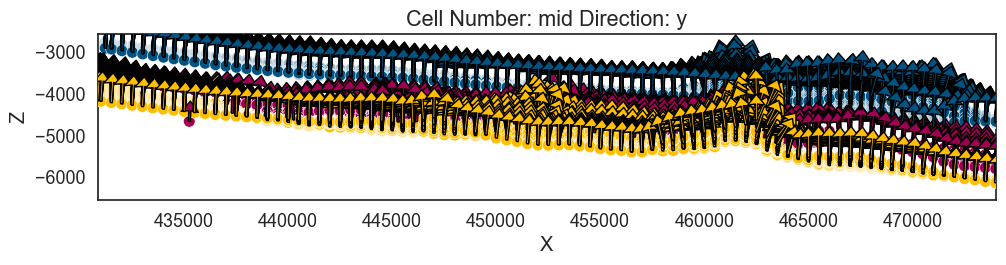

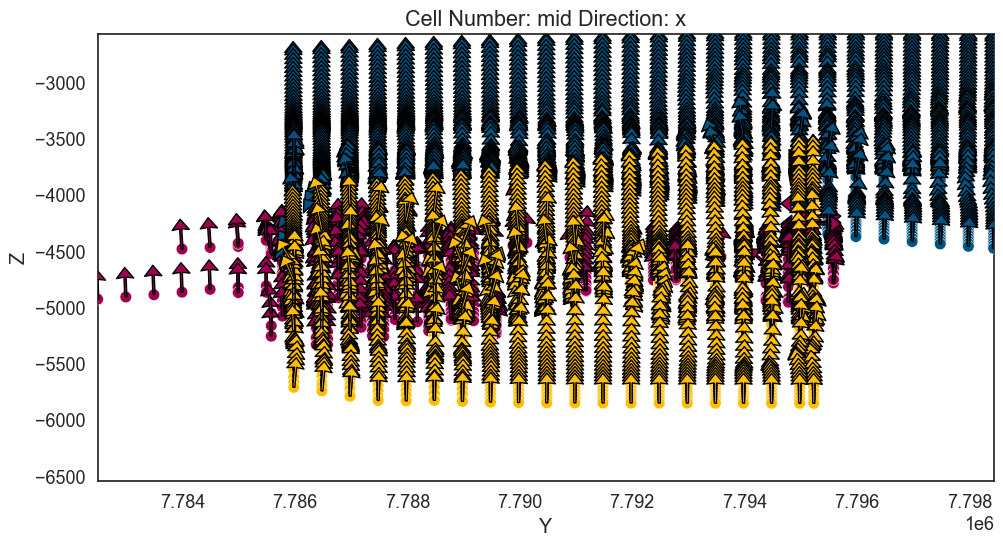

In [11]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [12]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [13]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                46185.28
$C_o$             50787613.78
drift equations  [3, 3, 3, 3]
CPU times: total: 19.1 s
Wall time: 20.5 s


In [14]:
geo_model.update_to_interpolator()

True

In [15]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 27min 45s
Wall time: 6min 5s



Lithology ids 
  [4. 4. 4. ... 1. 1. 1.] 

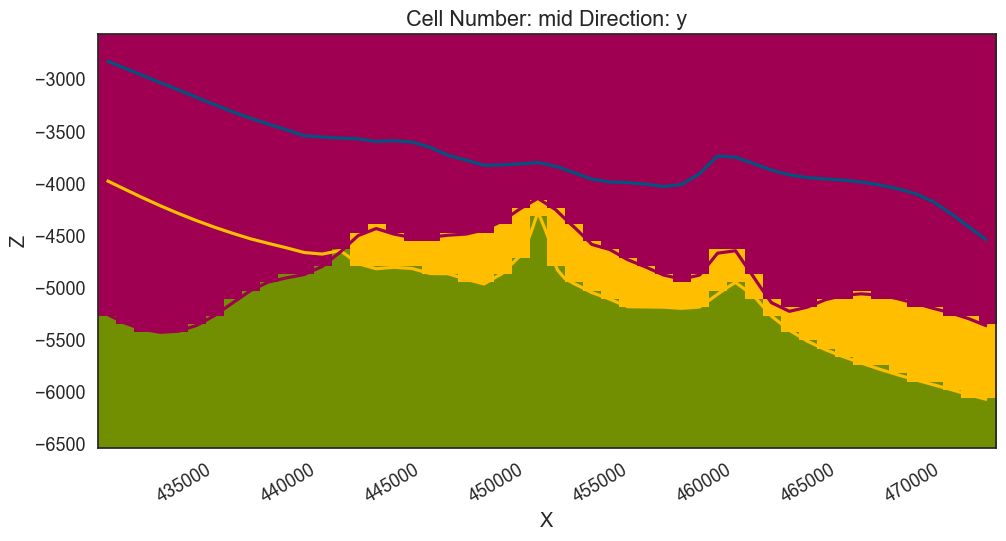

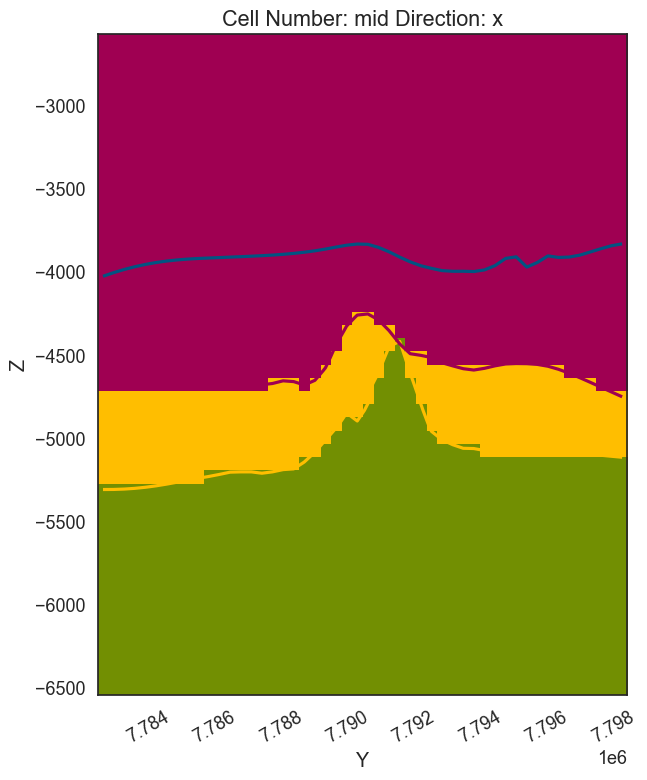

In [16]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=5,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [17]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [19]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

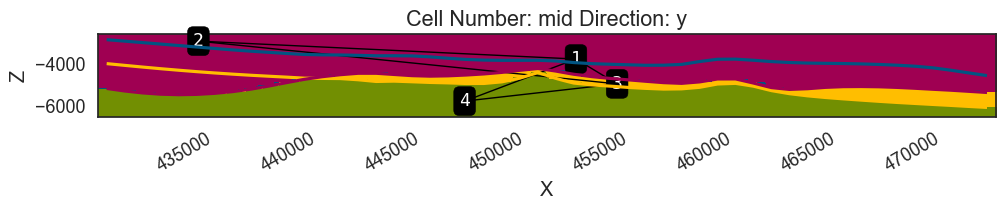

In [20]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [20]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [21]:
import pickle
save_path = "../../../../../output/BES/interpreted_seismics_2/surfaces/teste_2/"
with open(save_path + nome_modelo, "wb") as f:
    pickle.dump(geo_model, f)